In [78]:
%matplotlib inline
import networkx as nx


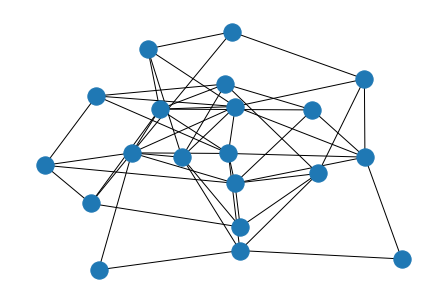

In [79]:
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [80]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state

In [81]:
initial_state(G)


{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [82]:
import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state

In [83]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'awake',
 1: 'awake',
 2: 'awake',
 9: 'awake',
 10: 'awake',
 13: 'awake',
 14: 'awake'}

In [84]:
from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Simple Sim')

In [85]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

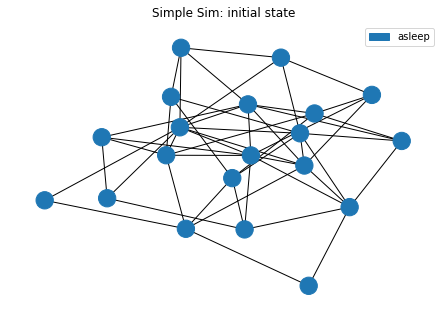

In [86]:
sim.draw()

In [87]:
sim.run()

In [88]:
sim.steps

1

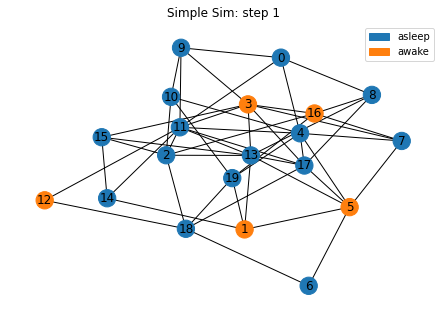

In [89]:
sim.draw(with_labels=True)

In [90]:
sim.state()

{0: 'asleep',
 1: 'awake',
 2: 'asleep',
 3: 'awake',
 4: 'asleep',
 5: 'awake',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'awake',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'awake',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [91]:
sim.run(10)

In [92]:
sim.steps


11

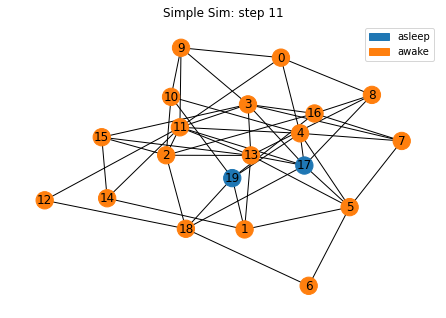

In [93]:
sim.draw(with_labels=True)


<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

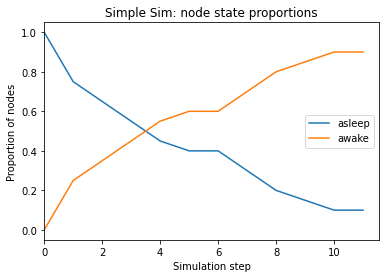

In [94]:
sim.plot()


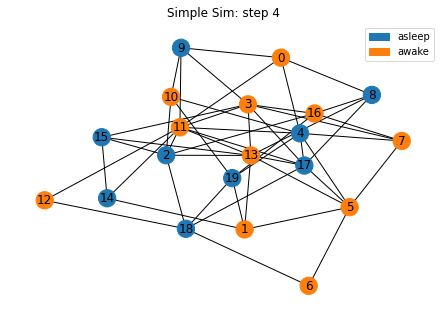

In [95]:
sim.draw(4, with_labels=True)


In [96]:
sim.state(4)


{0: 'awake',
 1: 'awake',
 2: 'asleep',
 3: 'awake',
 4: 'asleep',
 5: 'awake',
 6: 'awake',
 7: 'awake',
 8: 'asleep',
 9: 'asleep',
 10: 'awake',
 11: 'awake',
 12: 'awake',
 13: 'awake',
 14: 'asleep',
 15: 'asleep',
 16: 'awake',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

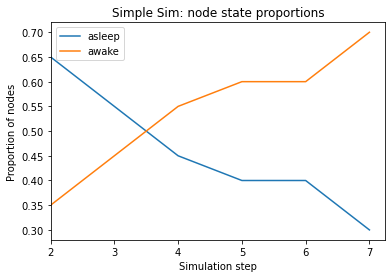

In [97]:
sim.plot(min_step=2, max_step=8)


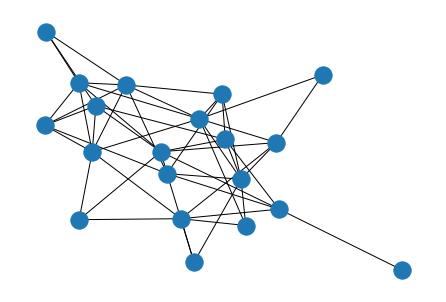

In [98]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [99]:
import random
import string

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state

In [100]:
initial_state(G)


{0: 'A',
 1: 'B',
 2: 'A',
 3: 'B',
 4: 'B',
 5: 'A',
 6: 'B',
 7: 'B',
 8: 'D',
 9: 'A',
 10: 'A',
 11: 'C',
 12: 'A',
 13: 'B',
 14: 'B',
 15: 'C',
 16: 'A',
 17: 'B',
 18: 'A',
 19: 'A'}

In [101]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        # Caveat: what if the node has no neighbors?
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [102]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'C',
 1: 'D',
 2: 'D',
 3: 'B',
 4: 'D',
 5: 'A',
 6: 'C',
 7: 'D',
 8: 'B',
 9: 'A',
 10: 'D',
 11: 'B',
 12: 'D',
 13: 'A',
 14: 'C',
 15: 'C',
 16: 'C',
 17: 'D',
 18: 'C',
 19: 'B'}

In [103]:
import matplotlib.pyplot as plt

sim = Simulation(G, initial_state, state_transition, name='Voter Model')

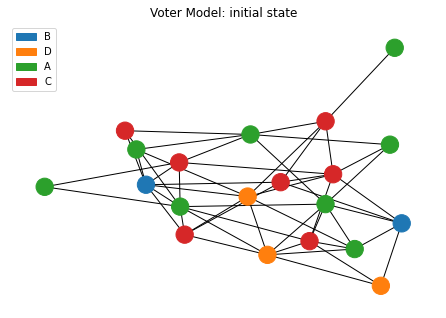

In [104]:
sim.draw()

In [105]:
sim.run(40)


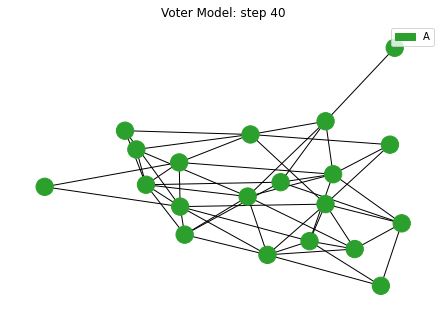

In [106]:
sim.draw()


<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

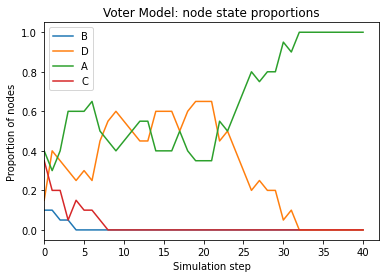

In [107]:
sim.plot()


In [108]:
import random

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [109]:
def state_transition_async(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

In [110]:
def state_transition_async(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

<AxesSubplot:title={'center':'Async Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

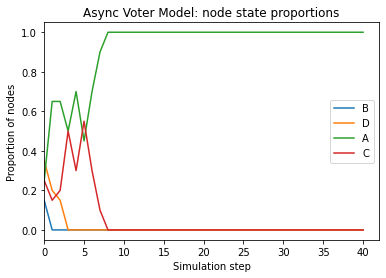

In [111]:
sim = Simulation(G, initial_state, state_transition_async, name='Async Voter Model')
sim.run(40)
sim.plot()


In [112]:
def stop_condition(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) <= 1
    return is_stopped

In [113]:
sim = Simulation(G, initial_state, state_transition, stop_condition, name='Voter model')
sim.run(100)

Stop condition met at step 26.


In [114]:
sim.steps


26

<AxesSubplot:title={'center':'Voter model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

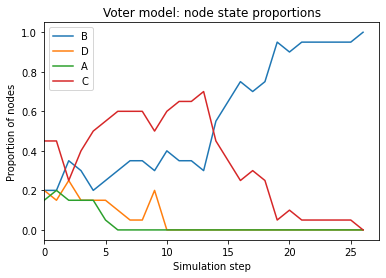

In [115]:
sim.plot()


In [116]:
def state_transition_async_rewiring(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
            neighbor = random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node, neighbor)
            
    return current_state

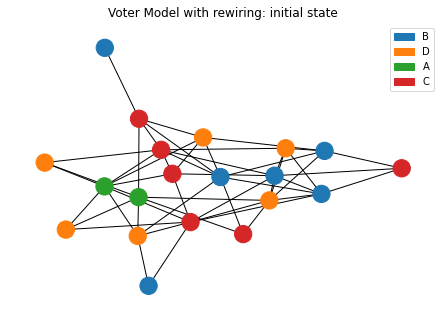

In [117]:
sim = Simulation(G, initial_state, state_transition_async_rewiring, stop_condition,
                 name='Voter Model with rewiring')
sim.draw()

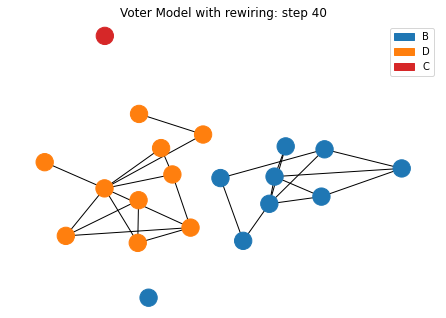

In [118]:
sim.run(40)
sim.draw()

<AxesSubplot:title={'center':'Voter Model with rewiring: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

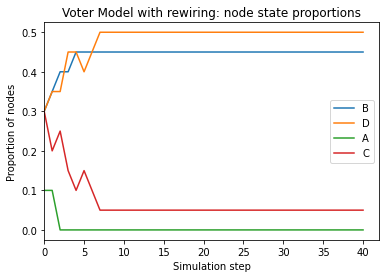

In [119]:
sim.plot()


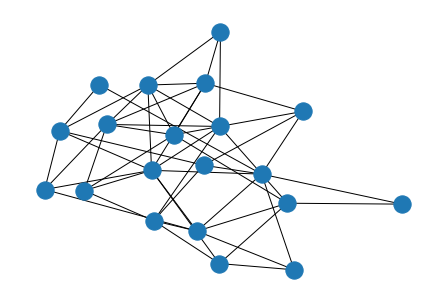

In [120]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [121]:
import random

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state

In [122]:
initial_state(G)


{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'I',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

In [123]:
MU = 0.1
BETA = 0.1

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state

In [124]:
test_state = initial_state(G)
state_transition(G, test_state)

{}

In [125]:
sim = Simulation(G, initial_state, state_transition, name='SIS model')


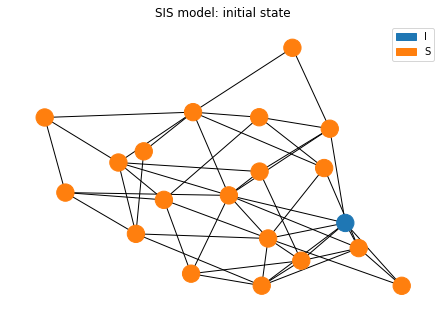

In [126]:
sim.draw()


In [127]:
sim.run(25)

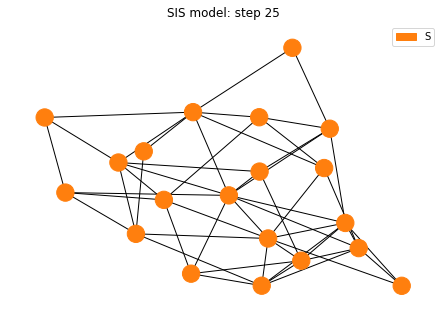

In [128]:
sim.draw()


<AxesSubplot:title={'center':'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

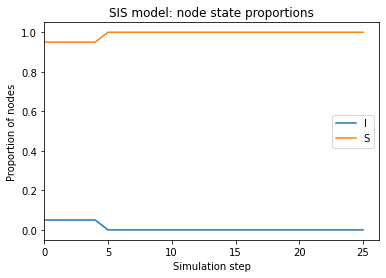

In [129]:
sim.plot()
